In [ ]:
#Make figure PC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff

In [27]:
#loading datat
input_filepath='/groups/zimmer/Ulises/wbfm/chemotaxis_assay/2020_Only_behaviour/btf_all_binary2_eroded_twice/2020-07-01_18-36-25_control_worm6-channel-0-bigtiff.btf'

#path='2020-07-01_18-36-25_control_worm6_spline_K.csv'

# has no reversals
path='/groups/zimmer/Ulises/wbfm/chemotaxis_assay/2020_Only_behaviour/all_good_skeleton/2020-06-30_18-17-47_chemotaxis_worm5_spline_K.csv'
df=pd.read_csv(path, header=None)

df.shape
#What to do with Nas?
#df.dropna(inplace=True) #Drop NaNs, required otherwise pca.fit_transform(x) does not run
df.fillna(0, inplace=True) #alternative change nans to zeros
features = np.arange(30,90)# Separating out the features (starting bodypart, ending bodypart)
data = df.loc[:, features].values
print('data shape: ', data.shape)

#PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(data)
print(principalComponents.shape)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3','PC4','PC5', 'PC6'])#, 'PC7', 'PC8','PC9','PC10'])
print(principalDf.shape)


data shape:  (7361, 60)
(7361, 6)
(7361, 6)


In [28]:
avg_win=167
x=principalDf.loc[:,'PC1'].rolling(window=avg_win).mean()
y=principalDf.loc[:,'PC2'].rolling(window=avg_win).mean()
z=principalDf.loc[:,'PC3'].rolling(window=avg_win).mean()


In [33]:
avg_win=167
x2=principalDf.loc[:,'PC4'].rolling(window=avg_win).mean()
y2=principalDf.loc[:,'PC5'].rolling(window=avg_win).mean()
z2=principalDf.loc[:,'PC6'].rolling(window=avg_win).mean()

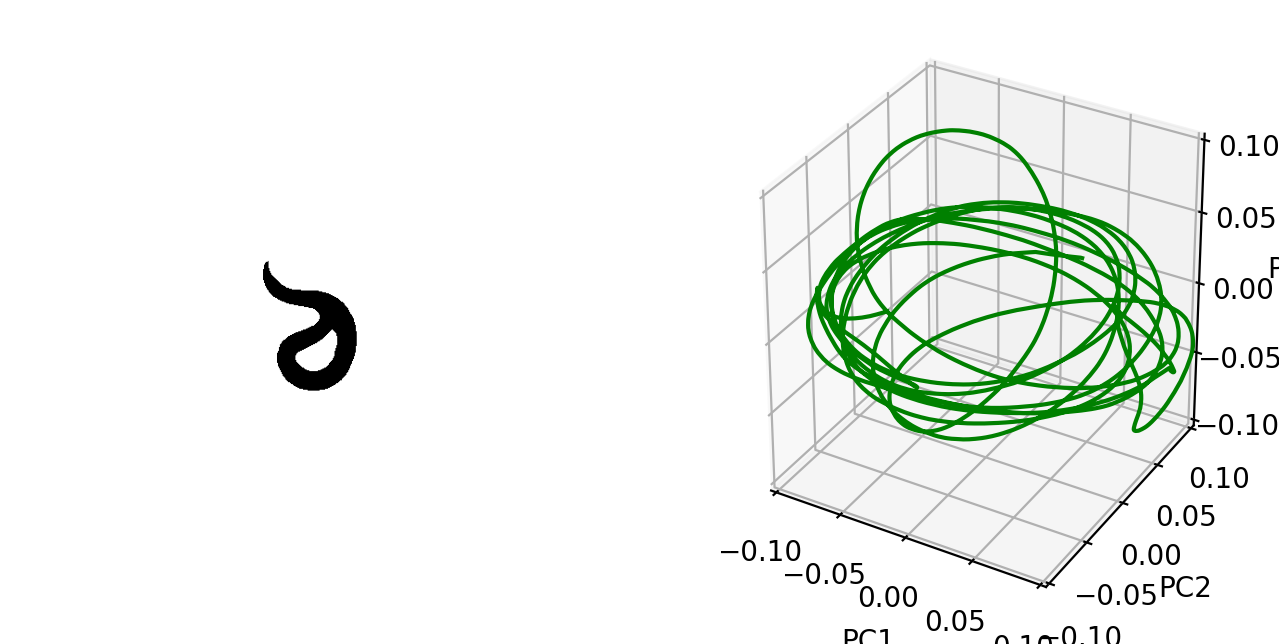

break 70


In [30]:

fig = plt.figure(figsize=plt.figaspect(0.5), dpi=200)
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2, projection='3d')

with tiff.TiffFile(input_filepath, multifile=False) as tif:
    for i, page in enumerate(tif.pages):
        if i%10!=0: continue
        img=page.asarray()

        ax0.imshow(img, cmap='Greys')
        ax0.set_axis_off()
        
        
        
#        ax1.plot(x[0:i], y[0:i], z[0:i], 'green')
        ax1.plot(x, y, z, 'green')
        lim=0.1
        ax1.set_xlim([-lim,lim])
        ax1.set_ylim([-lim,lim])
        ax1.set_zlim([-lim,lim])
        ax1.set_xlabel('PC1')
        ax1.set_ylabel('PC2')
        ax1.set_zlabel('PC3')
        plt.show()
        
        if i>61:
            print('break', i)
            break
        

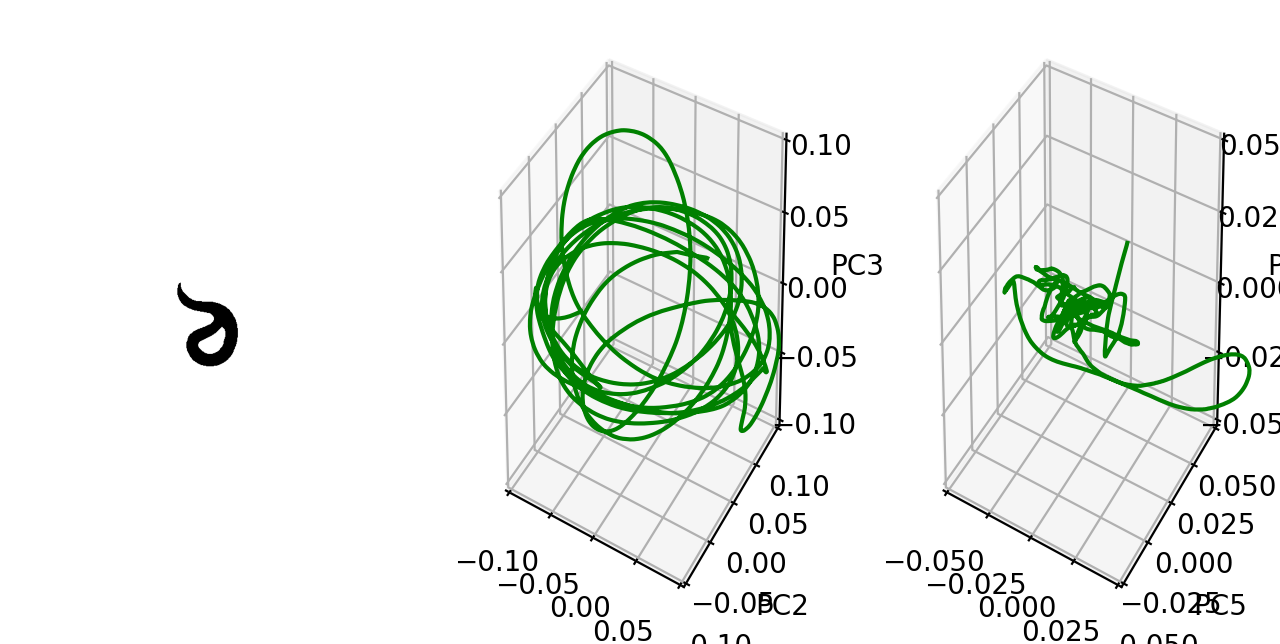

break 70


In [36]:

fig = plt.figure(figsize=plt.figaspect(0.5), dpi=200)
ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2, projection='3d')
ax2 = fig.add_subplot(1, 3, 3, projection='3d')

with tiff.TiffFile(input_filepath, multifile=False) as tif:
    for i, page in enumerate(tif.pages):
        if i%10!=0: continue
        img=page.asarray()

        ax0.imshow(img, cmap='Greys')
        ax0.set_axis_off()
        
        
        
#        ax1.plot(x[0:i], y[0:i], z[0:i], 'green')
        ax1.plot(x, y, z, 'green')
        lim=0.1
        ax1.set_xlim([-lim,lim])
        ax1.set_ylim([-lim,lim])
        ax1.set_zlim([-lim,lim])
        ax1.set_xlabel('PC1')
        ax1.set_ylabel('PC2')
        ax1.set_zlabel('PC3')
        
        
        ax2.plot(x2, y2, z2, 'green')
        lim=0.05
        ax2.set_xlim([-lim,lim])
        ax2.set_ylim([-lim,lim])
        ax2.set_zlim([-lim,lim])
        ax2.set_xlabel('PC4')
        ax2.set_ylabel('PC5')
        ax2.set_zlabel('PC6')
        
        plt.show()
        
        if i>61:
            print('break', i)
            break
        